# Exploratory Data Analysis (EDA)

### Introduction
This dataset contains records of online auctions conducted on the Bidoo platform. Each record represents a closed auction and includes details such as the final bid price, the total number of bids, auction duration, shipping costs, and the bidding modality (manual vs. automatic). 

### Step 1: Understanding the Dataset Structure

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "closed_auctions.csv" 
df = pd.read_csv(file_path)

# Basic Info
print("Dataset Info:")
print(df.info())

# Check for missing values
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49523 entries, 0 to 49522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bid                49523 non-null  float64
 1   currency           49523 non-null  object 
 2   num_bids           49523 non-null  int64  
 3   name               49523 non-null  object 
 4   shipping_expenses  49523 non-null  float64
 5   timestamp          49523 non-null  float64
 6   timer              49523 non-null  int64  
 7   price              49523 non-null  float64
 8   winner_expenses    49523 non-null  float64
 9   winner_modality    49523 non-null  object 
 10  winner_num_bids    49523 non-null  int64  
 11  winner_username    49523 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 4.5+ MB
None
bid                  0
currency             0
num_bids             0
name                 0
shipping_expenses    0
timestamp            0


There is no missing value in this dataset.

In [50]:
for col in df.select_dtypes(include=["object", "category"]).columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(), "\n")

currency: 1 unique values
currency
EUR    49523
Name: count, dtype: int64 

name: 1109 unique values
name
10€ bidoo shop                         4163
amazon.it gift certificate from 10€    3284
gift certificate amazon.it from 5€     2937
5€ bidoo shop                          2870
20€ bidoo shop                         2130
Name: count, dtype: int64 

winner_modality: 2 unique values
winner_modality
automatic    33762
manual       15761
Name: count, dtype: int64 



Since there are 1109 unique item names, directly encoding each as a unique feature would create high cardinality, leading to overfitting and sparsity issues. We'll group items into meaningful categories.

In [51]:
print(df.columns) 

# Categorizing the "name" column into meaningful item categories
def categorize_item(name):
    name = name.lower()
    if "bidoo" in name or "points" in name:
        return "Bidoo Credits"
    elif any(x in name for x in ["€"]):
        return "Gift Card"
    elif any(x in name for x in ["iphone", "samsung", "xiaomi", "airpods", "macbook", "tablet", "laptop", "tv", "camera","earbuds"]):
        return "Electronics"
    elif any(x in name for x in ["dyson", "nespresso", "vacuum", "blender", "kitchen", "coffee", "fridge", "oven"]):
        return "Home Appliances"
    elif any(x in name for x in ["gucci", "rolex", "louis vuitton", "luxury", "prada", "chanel", "hermes"]):
        return "Luxury Goods"
    elif any(x in name for x in ["playstation", "nintendo", "xbox", "gaming", "console"]):
        return "Gaming & Entertainment"
    elif any(x in name for x in ["scooter", "bike", "car", "vehicle", "motorcycle"]):
        return "Transportation"
    else:
        return "Other"

# Apply item categorization
df["item_category"] = df["name"].apply(categorize_item)

# Drop the original 'name' column after categorization
df.drop(columns=["name"], inplace=True)

# Display the count of each category
df["item_category"].value_counts()

Index(['bid', 'currency', 'num_bids', 'name', 'shipping_expenses', 'timestamp',
       'timer', 'price', 'winner_expenses', 'winner_modality',
       'winner_num_bids', 'winner_username'],
      dtype='object')


item_category
Gift Card                 24500
Bidoo Credits             13224
Other                      8548
Electronics                2538
Gaming & Entertainment      290
Home Appliances             187
Transportation              147
Luxury Goods                 89
Name: count, dtype: int64

### Step 2: Feature Inspection

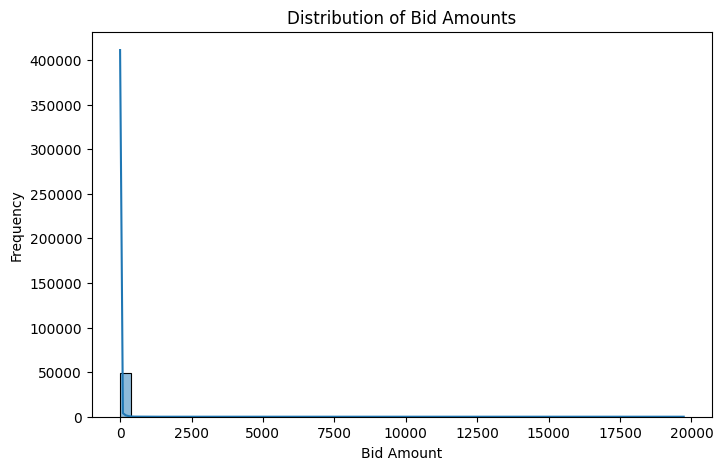

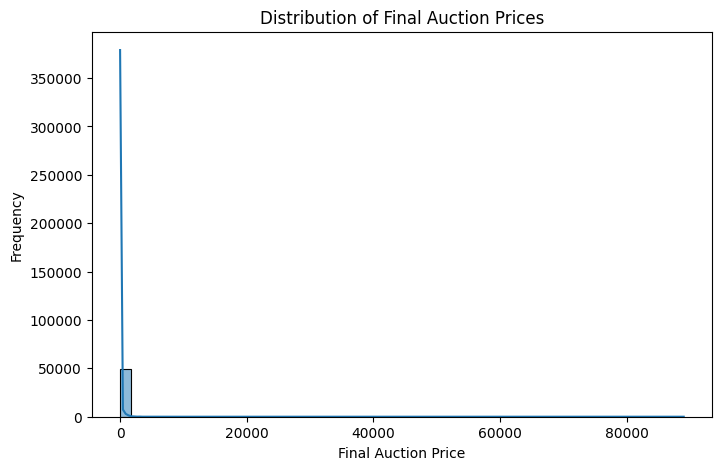

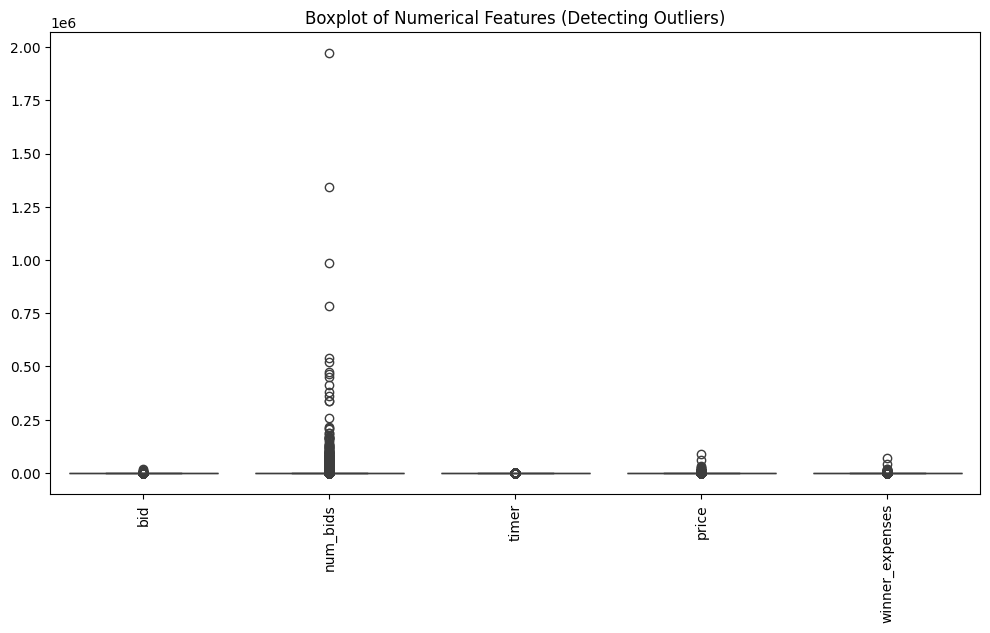

In [52]:
# Plot bid amount distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["bid"], bins=50, kde=True)
plt.xlabel("Bid Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Bid Amounts")
plt.show()

# Plot final auction price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=50, kde=True)
plt.xlabel("Final Auction Price")
plt.ylabel("Frequency")
plt.title("Distribution of Final Auction Prices")
plt.show()

# Boxplot to detect outliers in numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["bid", "num_bids", "timer", "price", "winner_expenses"]])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features (Detecting Outliers)")
plt.show()


The distribution of bid amounts and distribution prices are both highly skewed.

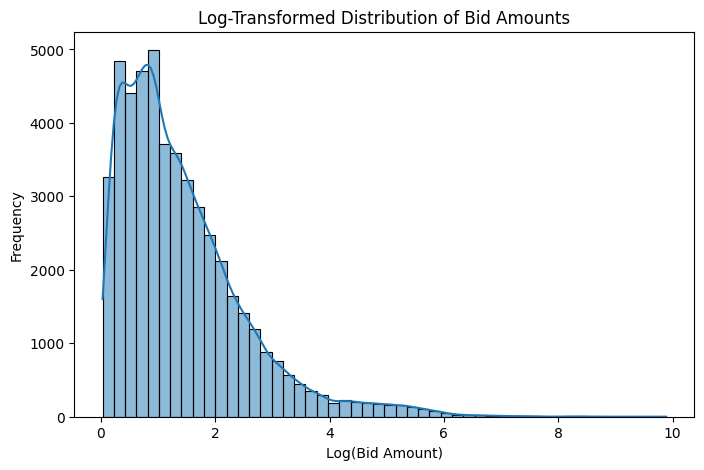

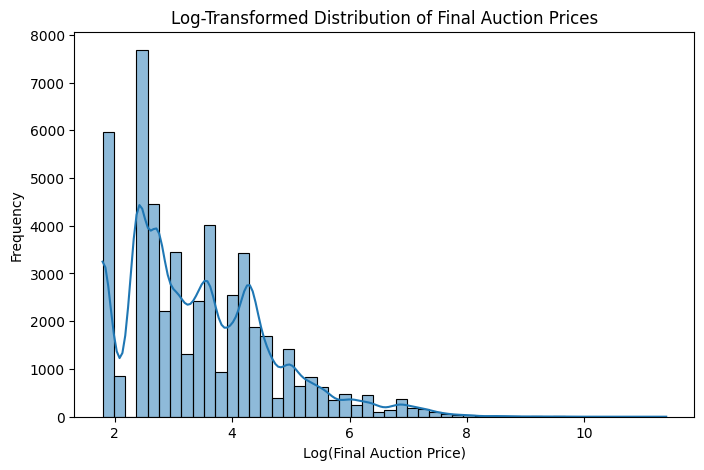

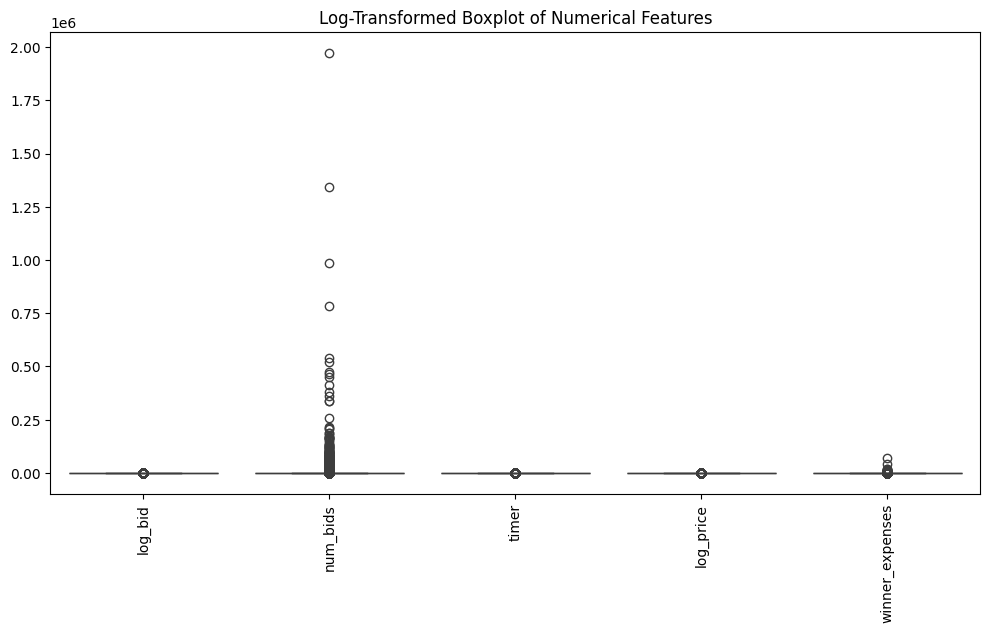

In [53]:
import numpy as np
# Log Transformation for Skewed Data
# Apply log transformation (adding 1 to avoid log(0) issue)
df["log_bid"] = np.log1p(df["bid"])
df["log_price"] = np.log1p(df["price"])

# Plot log-transformed bid amount distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["log_bid"], bins=50, kde=True)
plt.xlabel("Log(Bid Amount)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Distribution of Bid Amounts")
plt.show()

# Plot log-transformed final auction price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["log_price"], bins=50, kde=True)
plt.xlabel("Log(Final Auction Price)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Distribution of Final Auction Prices")
plt.show()

# Use Log-Transformed Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["log_bid", "num_bids", "timer", "log_price", "winner_expenses"]])
plt.xticks(rotation=90)
plt.title("Log-Transformed Boxplot of Numerical Features")
plt.show()


Log-transformation makes the distributions more normal-like. 

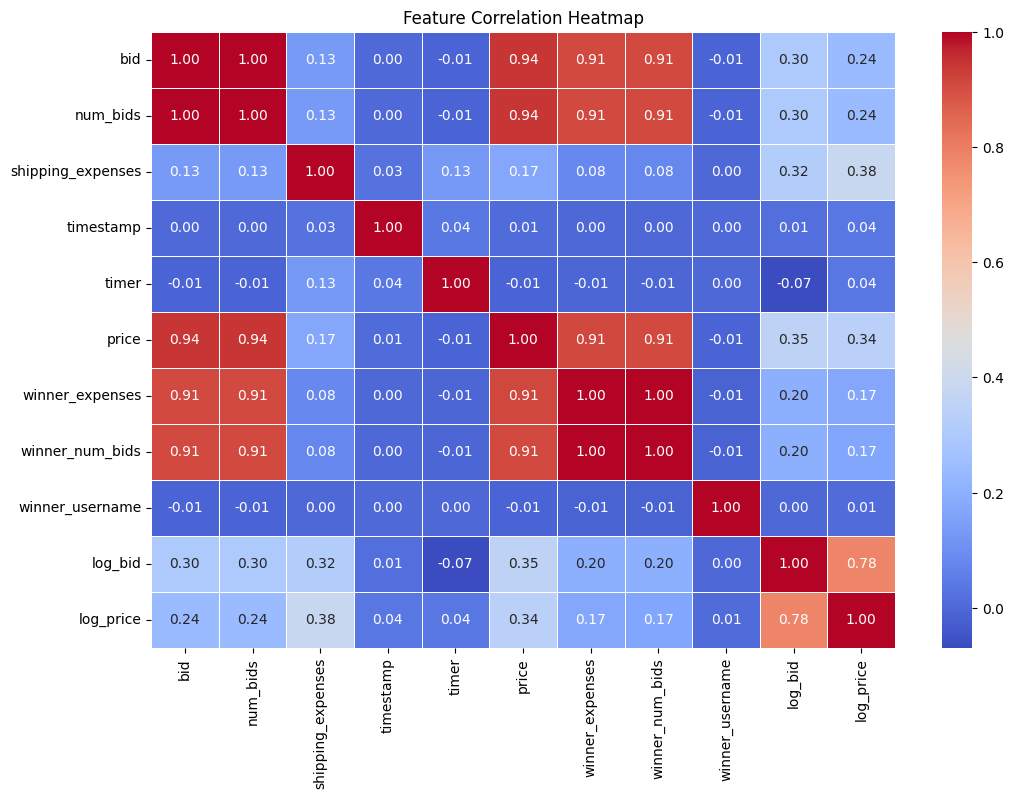

In [54]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

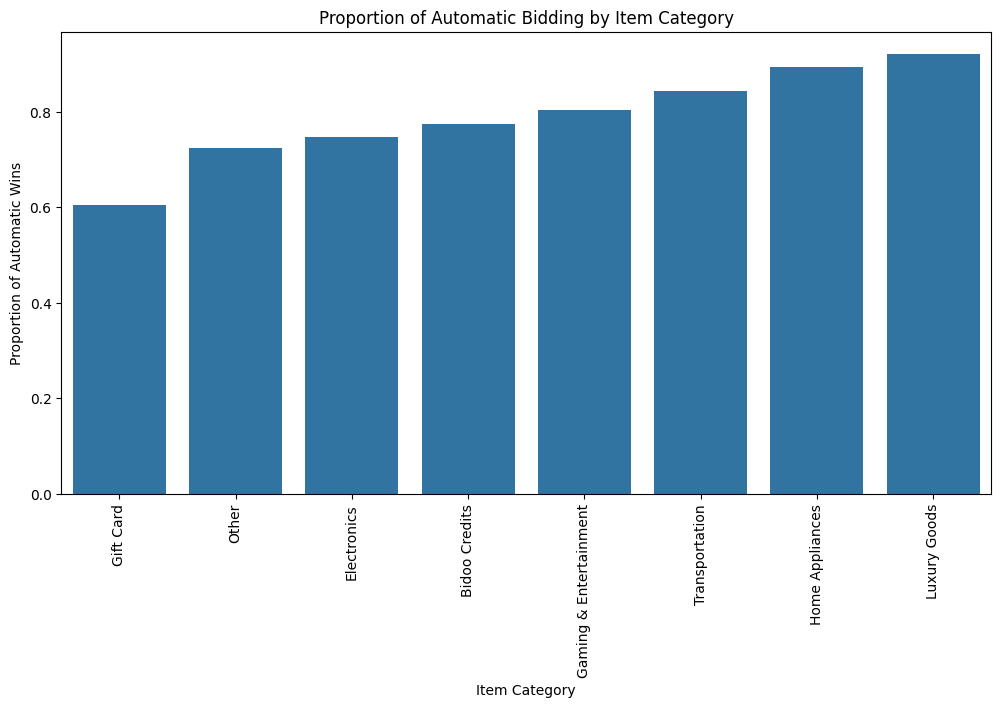

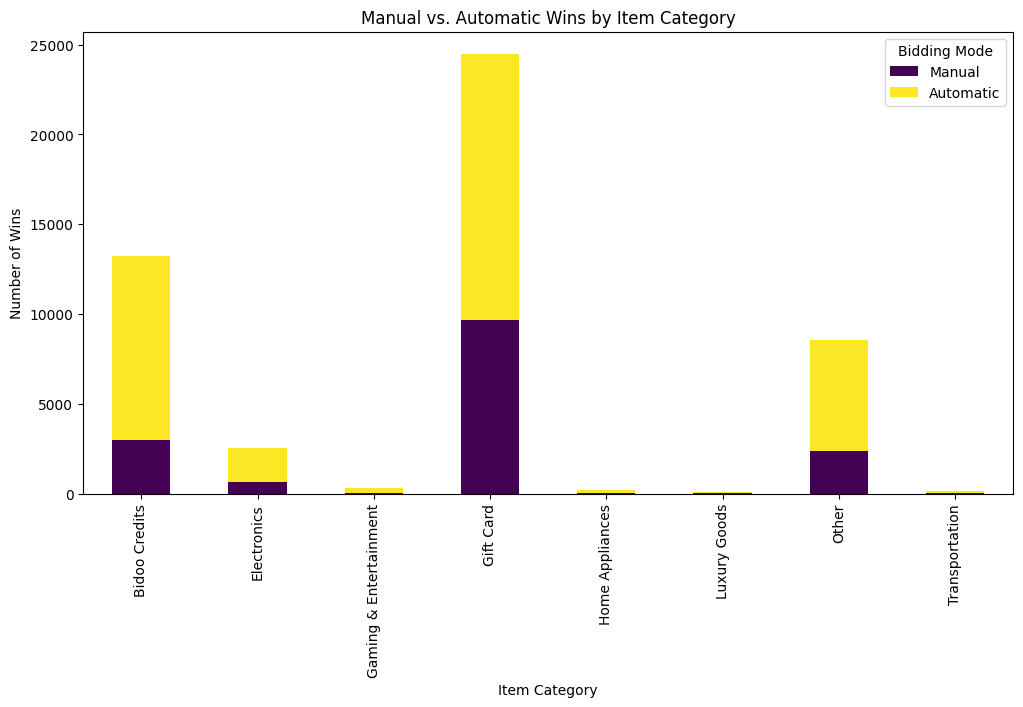

In [55]:
# Winning Modality Analysis
import matplotlib.pyplot as plt
import seaborn as sns
# Convert 'winner_modality' to numeric (0 = manual, 1 = automatic)
df["winner_modality"] = df["winner_modality"].map({"manual": 0, "automatic": 1})

# Compute the proportion of automatic bidding for each item category
modality_counts = df.groupby("item_category")["winner_modality"].mean().sort_values()

# Plot the proportion of automatic wins by item category
plt.figure(figsize=(12, 6))
sns.barplot(x=modality_counts.index, y=modality_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Item Category")
plt.ylabel("Proportion of Automatic Wins")
plt.title("Proportion of Automatic Bidding by Item Category")
plt.show()

# Count total wins by item category and bidding type
modality_distribution = df.groupby(["item_category", "winner_modality"]).size().unstack()

# Stacked bar chart for winning modality by item category
modality_distribution.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xticks(rotation=90)
plt.xlabel("Item Category")
plt.ylabel("Number of Wins")
plt.title("Manual vs. Automatic Wins by Item Category")
plt.legend(["Manual", "Automatic"], title="Bidding Mode")
plt.show()

This confirms that bidding behavior is strongly dependent on the item type.